In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

df = pd.read_csv("20210224-AHU6PHC-PIDtuning.csv")

In [6]:
df["DateTime"] = df["Date"] + " " + df["Time"]
df["DateTime"] = pd.to_datetime(df["DateTime"])

df.sort_values("DateTime", inplace=True)
df["Heating Coil Fill"] = df["41CS.RF.AH06.HCOIL.VLV PCT"].ffill()
df["Actual Temperature Fill"] = df["41CS.RF.AH06.SUP.TEMP DEG F"].ffill()
df["Setpoint Fill"] = df["41CS.RF.AH06.SUP.TEMP.STPT DEG F"].ffill()

df.head(100)



,Date,Time,41CS.RF.AH06.HCOIL.VLV PCT,41CS.RF.AH06.REHEAT.VLV PCT,41CS.RF.AH06.SUP.TEMP DEG F,41CS.RF.AH06.SUP.TEMP.STPT DEG F,41CS.RF.OAT DEG F,41CS.RF.AH06.SAT.LPT PCT,DateTime,Heating Coil Fill,Actual Temperature Fill,Setpoint Fill
0,2/24/2021,11:55:25,26.095413,0.0,64.493561,65.0,NaN,NaN,2021-02-24 11:55:25,26.095413,64.493561,65.0
1,2/24/2021,11:55:27,25.785400,NaN,65.537300,NaN,NaN,NaN,2021-02-24 11:55:27,25.785400,65.537300,65.0
2,2/24/2021,11:55:36,NaN,NaN,66.556053,NaN,NaN,NaN,2021-02-24 11:55:36,25.785400,66.556053,65.0
3,2/24/2021,11:55:37,25.390419,NaN,NaN,NaN,NaN,NaN,2021-02-24 11:55:37,25.390419,66.556053,65.0
4,2/24/2021,11:55:45,NaN,NaN,67.593552,NaN,NaN,NaN,2021-02-24 11:55:45,25.390419,67.593552,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2/24/2021,12:05:57,18.129593,NaN,NaN,NaN,NaN,NaN,2021-02-24 12:05:57,18.129593,69.693542,65.0
96,2/24/2021,12:06:03,NaN,NaN,70.718544,NaN,NaN,NaN,2021-02-24 12:06:03,18.129593,70.718544,65.0
97,2/24/2021,12:06:07,17.355034,NaN,NaN,NaN,NaN,59.967041,2021-02-24 12:06:07,17.355034,70.718544,65.0
98,2/24/2021,12:06:17,16.578995,NaN,NaN,NaN,NaN,NaN,2021-02-24 12:06:17,16.578995,70.718544,65.0


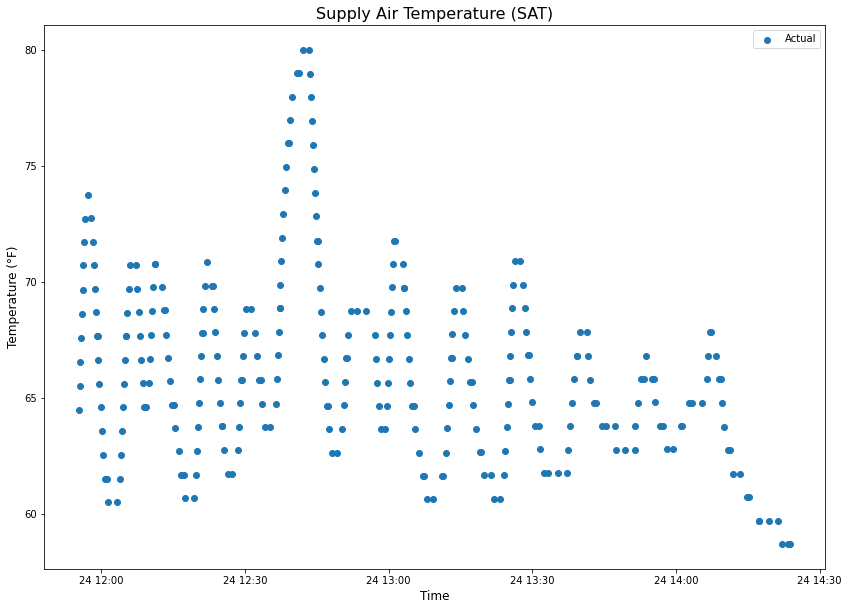

'\nfor i in df.columns:\n    if i not in ["Time", "Date", "DateTime"]:\n        plt.figure(figsize=(8,6))\n        plt.plot(df["DateTime"], df[i], label="Actual")\n        #plt.plot(df["DateTime"], df["Setpoint Fill"], label="Setpoint")\n        plt.xlabel("Time", fontsize=12)\n        plt.ylabel("Temperature (°F)", fontsize=12)\n        plt.title(i, fontsize=16)\n        #plt.legend()\n        #plt.xticks(rotation=300)\n        plt.show()\n'

In [5]:
#sns.lineplot(x="Time", y="41CS.RF.AH06.HCOIL.VLV PCT", data=df)
plt.figure(figsize=(14,10))
plt.scatter(df["DateTime"], df["41CS.RF.AH06.SUP.TEMP DEG F"], label="Actual")
#plt.plot(df["DateTime"], df["Setpoint Fill"], label="Setpoint")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature (°F)", fontsize=12)
plt.title("Supply Air Temperature (SAT)", fontsize=16)
plt.legend()
#plt.xticks(rotation=300)
plt.show()



'''
for i in df.columns:
    if i not in ["Time", "Date", "DateTime"]:
        plt.figure(figsize=(8,6))
        plt.plot(df["DateTime"], df[i], label="Actual")
        #plt.plot(df["DateTime"], df["Setpoint Fill"], label="Setpoint")
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Temperature (°F)", fontsize=12)
        plt.title(i, fontsize=16)
        #plt.legend()
        #plt.xticks(rotation=300)
        plt.show()
'''